In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


In [ ]:
!pip install spacytextblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.5/636.5 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.17.1
    Uninstalling textblob-0.17.1:
      Successfully uninstalled textblob-0.17.1


In [ ]:
!pip install 'spacy[transformers]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.9/197.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 8.3 MB/s eta 0:00:00


In [ ]:
!python -m spacy download en_core_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 28.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from google.colab import drive
import pandas as pd
import json
import matplotlib.pyplot as plt

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/My Drive/DAP/AMAZON_FASHION_5.json"
data = []
with open(file_path, 'r') as file:
    for line in file:
        json_data = json.loads(line)
        data.append(json_data)

df = pd.DataFrame(data)

In [ ]:
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3171,5.0,True,"07 2, 2018",A2077NII5H62R2,B005AGO4LU,"{'Size:': ' 8.5 B(M) US', 'Color:': ' Green Gl...",Amazon Customer,Perfect fit!,Five Stars,1530489600,NaN,NaN
3172,5.0,True,"06 28, 2018",A2IBS6PIPAGAB5,B005AGO4LU,"{'Size:': ' 5 B(M) US', 'Color:': ' Wolf Grey/...",J. Avila,My favorite cross trainers!,Comfortable,1530144000,NaN,NaN
3173,5.0,True,"06 25, 2018",A1GTC5EVSJNCQ8,B005AGO4LU,"{'Size:': ' 8 B(M) US', 'Color:': ' Blue Tint/...",Amazon Customer,Love them fit perfect,Five Stars,1529884800,NaN,NaN
3174,5.0,True,"06 20, 2018",A311XHHLM12MUT,B005AGO4LU,"{'Size:': ' 9 B(M) US', 'Color:': ' Blue Tint/...",Peter,Favorite Nike shoe ever! The flex sole is exce...,Love them!,1529452800,NaN,NaN


In [ ]:
ratings = list(df['overall'])

<Axes: >

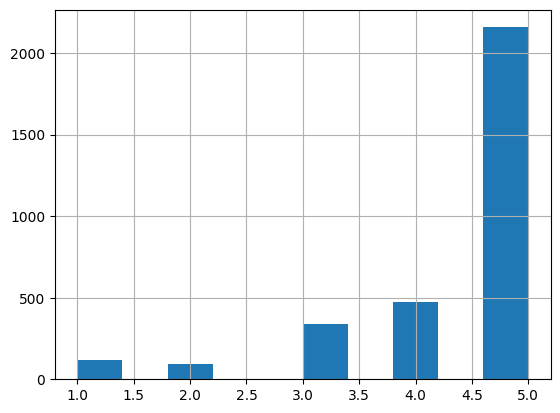

In [ ]:
df['overall'].hist()

In [ ]:
nlp = spacy.load('en_core_web_trf')
nlp.add_pipe('spacytextblob')
sentiments1 = []

for review in df['reviewText']:
  review = str(review)
  doc = nlp(review)
  polarity = doc._.blob.polarity
  sentiments1.append(polarity)

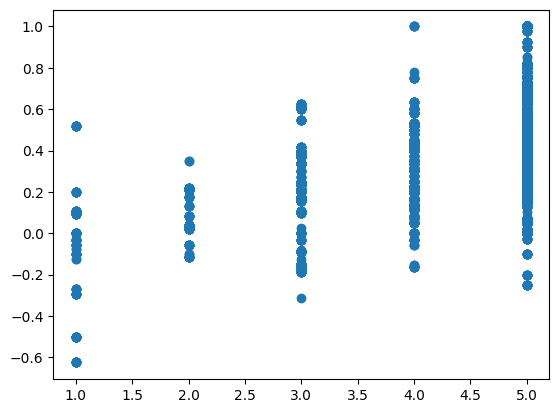

In [ ]:
plt.scatter(ratings, sentiments1)
plt.show()

array([[<Axes: title={'center': '0'}>]], dtype=object)

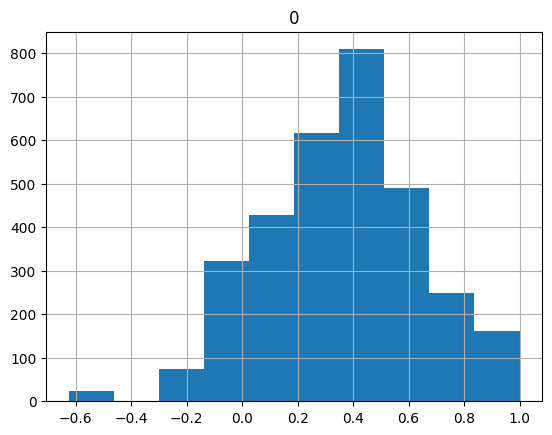

In [ ]:
sen_df1 = pd.DataFrame(sentiments1)
sen_df1.hist()

In [ ]:
sentiments2 = []

for review in df['reviewText']:
  review = str(review)
  polarity = analyzer.polarity_scores(review)
  sentiments2.append(polarity['compound'])

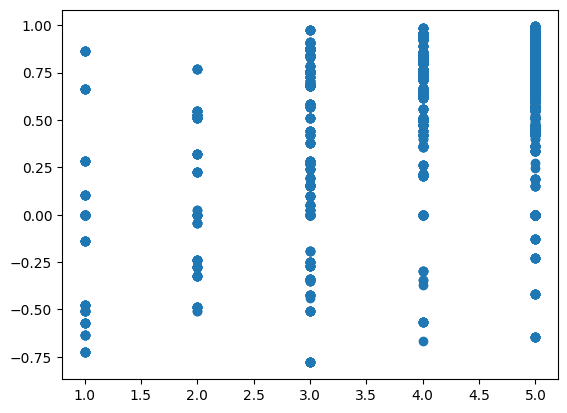

In [ ]:
plt.scatter(ratings, sentiments2)
plt.show()

array([[<Axes: title={'center': '0'}>]], dtype=object)

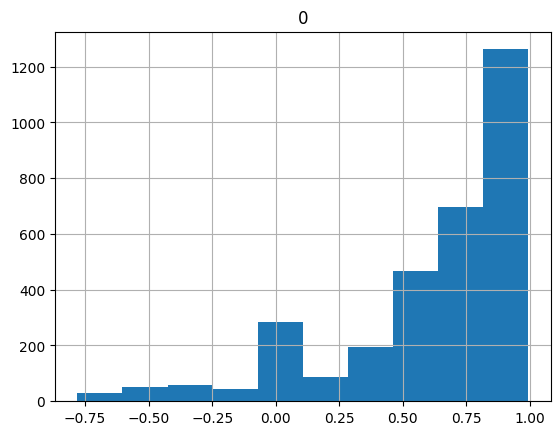

In [ ]:
sen_df2 = pd.DataFrame(sentiments2)
sen_df2.hist()